# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sinasc_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [15]:
df.dropna(subset=['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS'], inplace=True)

def grafico(chave: str, rotate = 0):
    ax = sns.countplot(x=chave, data=df)
    ax.set_ylabel('Contagem')
    if rotate > 0:
        ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rotate)
    return ax

<Axes: xlabel='APGAR1', ylabel='Contagem'>

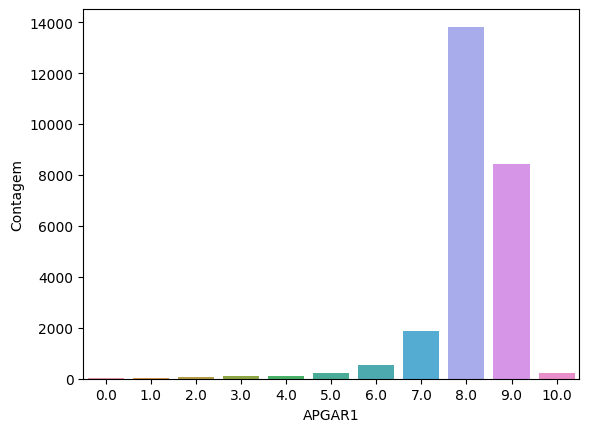

In [19]:
grafico('APGAR1')

<Axes: xlabel='APGAR5', ylabel='Contagem'>

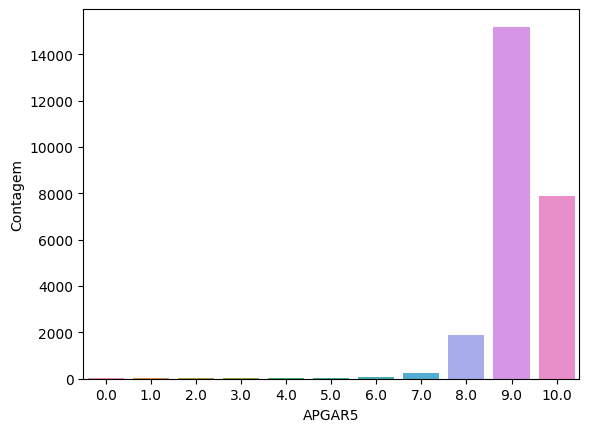

In [20]:
grafico('APGAR5')

<Axes: xlabel='SEXO', ylabel='Contagem'>

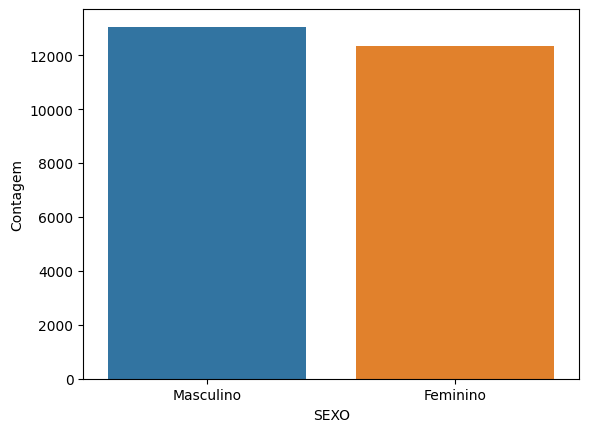

In [21]:
grafico('SEXO')

<Axes: xlabel='GESTACAO', ylabel='Contagem'>

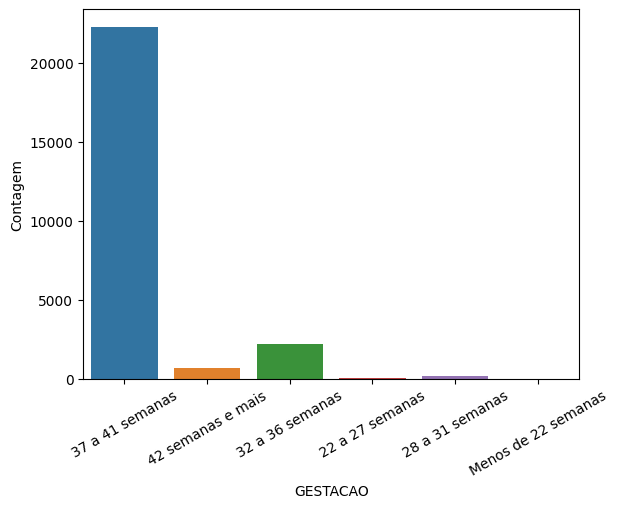

In [22]:
grafico('GESTACAO', 30)

<Axes: xlabel='ESTCIVMAE', ylabel='Contagem'>

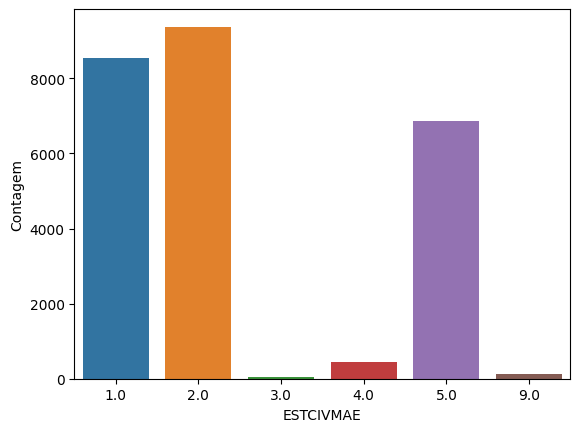

In [23]:
grafico('ESTCIVMAE')

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<Axes: xlabel='CONSULTAS', ylabel='APGAR5'>

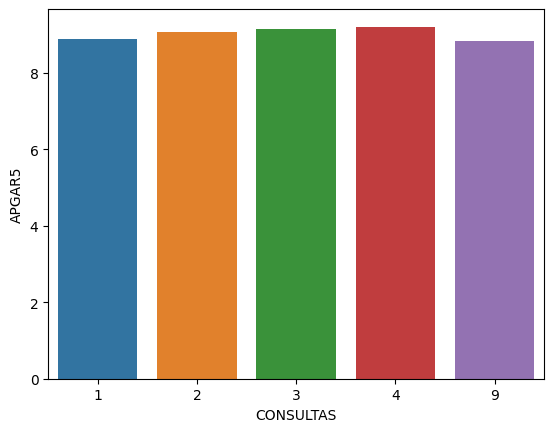

In [27]:
sns.barplot(x='CONSULTAS', y='APGAR5', estimator='mean', data=df, errorbar = None)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

In [37]:
plt.close('all')

[Text(0, 0, '37 a 41 semanas'),
 Text(1, 0, '42 semanas e mais'),
 Text(2, 0, '32 a 36 semanas'),
 Text(3, 0, '22 a 27 semanas'),
 Text(4, 0, '28 a 31 semanas'),
 Text(5, 0, 'Menos de 22 semanas')]

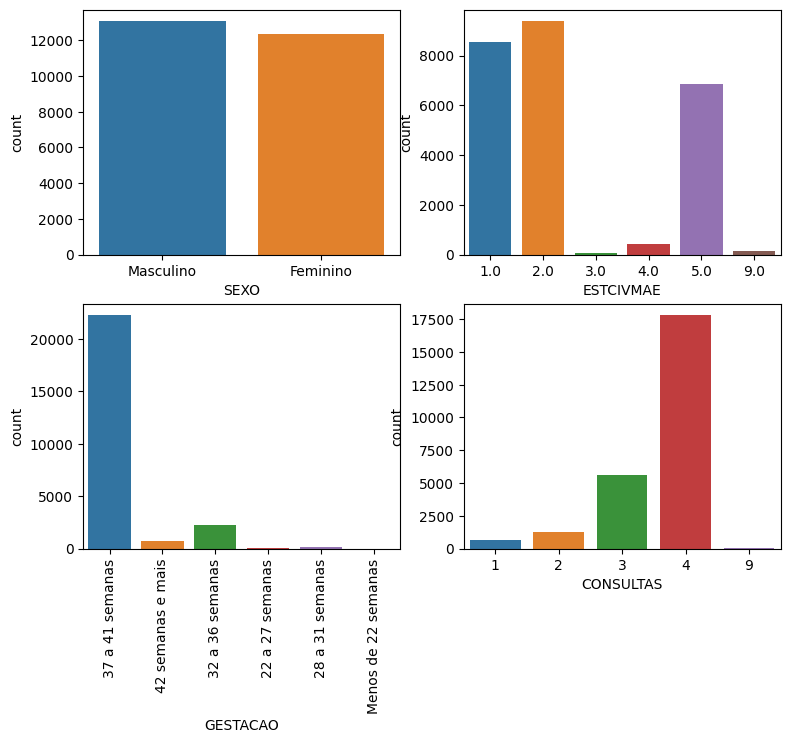

In [39]:
plt.rc('figure', figsize=(9, 7))
fig, axes = plt.subplots(2, 2)
sns.countplot(ax=axes[0,0], x='SEXO', data=df)
sns.countplot(ax=axes[0,1], x='ESTCIVMAE', data=df)
sns.countplot(ax=axes[1,1], x='CONSULTAS', data=df)
ax = sns.countplot(ax=axes[1,0], x='GESTACAO', data=df)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)